# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

## Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
не менее двух визуализаций должны быть интерактивными.

In [17]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Я взяла данные по употреблению алкоголя студентам и их оценкам по математике: https://www.kaggle.com/uciml/student-alcohol-consumption

### Context:
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

#### Content:
+ school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
+ sex - student's sex (binary: 'F' - female or 'M' - male)
+ age - student's age (numeric: from 15 to 22)
+ address - student's home address type (binary: 'U' - urban or 'R' - rural)
+ famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
+ Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
+ Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
+ Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
+ Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
+ Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
+ reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
+ guardian - student's guardian (nominal: 'mother', 'father' or 'other')
+ traveltime - home to school travel time (numeric: 1 - 1 hour)
+ studytime - weekly study time (numeric: 1 - 10 hours)
+ failures - number of past class failures (numeric: n if 1<=n<3, else 4)
+ schoolsup - extra educational support (binary: yes or no)
+ famsup - family educational support (binary: yes or no)
+ paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
+ activities - extra-curricular activities (binary: yes or no)
+ nursery - attended nursery school (binary: yes or no)
+ higher - wants to take higher education (binary: yes or no)
+ internet - Internet access at home (binary: yes or no)
+ romantic - with a romantic relationship (binary: yes or no)
+ famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
+ freetime - free time after school (numeric: from 1 - very low to 5 - very high)
+ goout - going out with friends (numeric: from 1 - very low to 5 - very high)
+ Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
+ Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
+ health - current health status (numeric: from 1 - very bad to 5 - very good)
+ absences - number of school absences (numeric: from 0 to 93)


* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

In [51]:
df = pd.read_csv('data/datasets_251_561_student-mat.csv')
# Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все правильно.
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [52]:
df.shape

(395, 33)

Всего в таблице 395 объектов и 33 переменных для них. Проверим есть ли пропущенные данные

In [53]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Посмотрим на распределение стуендтов по полу и возрасту. Девушек на курсе математике немного больше, чем парней, а средний возраст около 18 лет

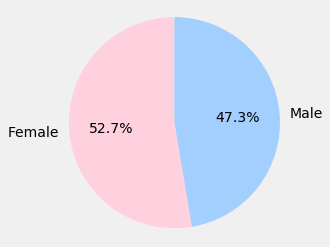

In [54]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(df['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

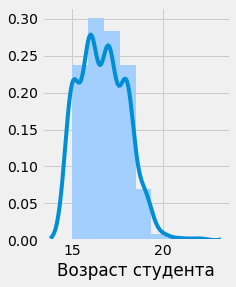

In [55]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.distplot(df['age'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=True, bins=8)
ax = ax.set(xlabel="Возраст студента")

#  Корреляция

Посмотрим на общую корреляцию всех переменных. Все переменные с оценками по математике имеют отрицательную корреояцию с употреблением алкоголя как среди рабочей недели, так и по выходным

Исходя из таблицы корреляции можно предположить, что существует довольно высокая положительная связь уровня образования отцов и уровня образования матерей. Кроме того, выход на улицу и потребление алкоголя в выходные имеют умеренную положительную корреляцию, что в принципе не удивитильно. 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

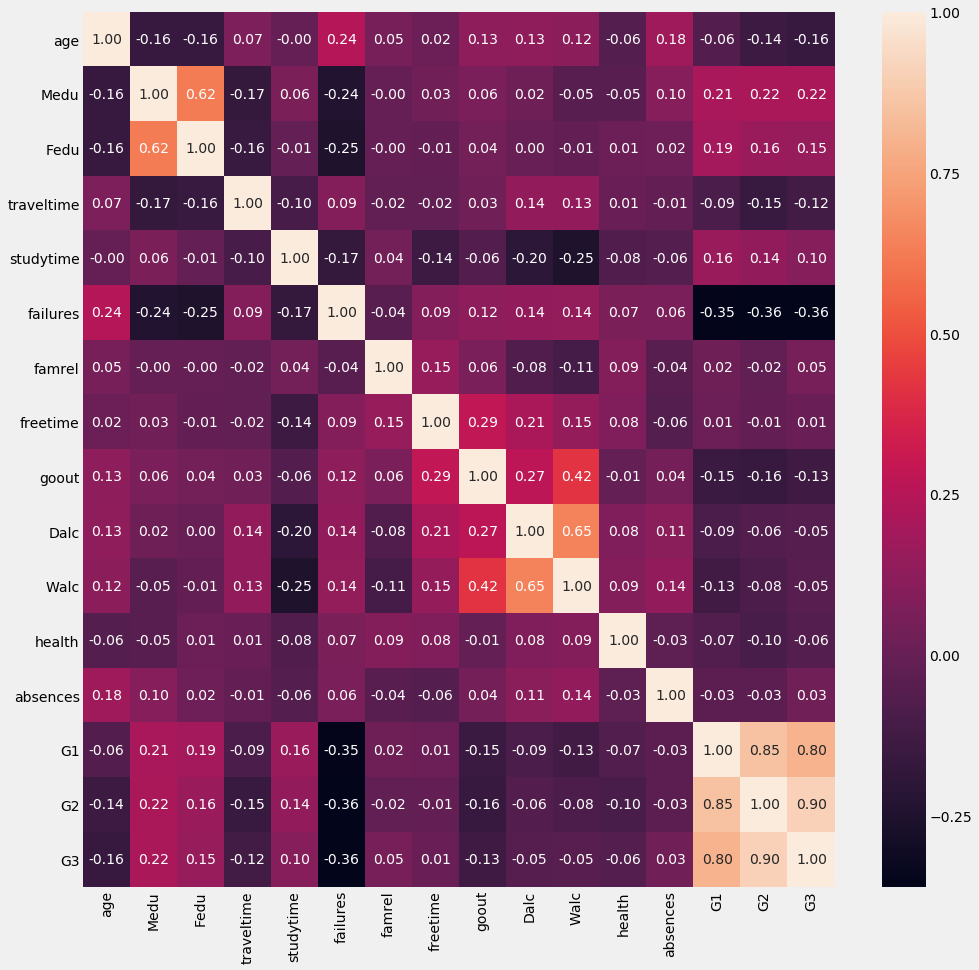

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

В датасете две переменных, которые отображают употребление алкоголя, это ежедневное и еженедельное употребление. Посмотрим более внимательно на эти признаки:

In [61]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

daily = go.Box(
    y = df.Dalc,
    name = "Daily alcohol consumption",
    marker = dict(color = "red")
)
weekly = go.Box(
    y = df.Walc,
    name = "Weekly  alcohol consumption",
    marker = dict(color = "blue")
)
 

data = [daily,weekly]
layout = {'title': 'Употребление алкоголя'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Соединим употребление алкоголя в будние дни с употреблением алкоголя в выходные

In [58]:
df['Dalc'] = df['Dalc'] + df['Walc']

В выборке нет студентов, которые совсем не употребляют алкоголь, каждый студент употребляет минимум 2 раза в неделю

Text(0.5,0,'Weekly alcohol consumption')

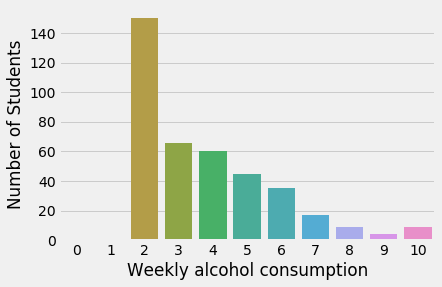

In [59]:
list = []
for i in range(11):
    list.append(len(df[df.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

Посмотрим отдельно на взаимолсвязь употребления алкоголя по выходным и финальные оценки по математике в зависимости от пола студента

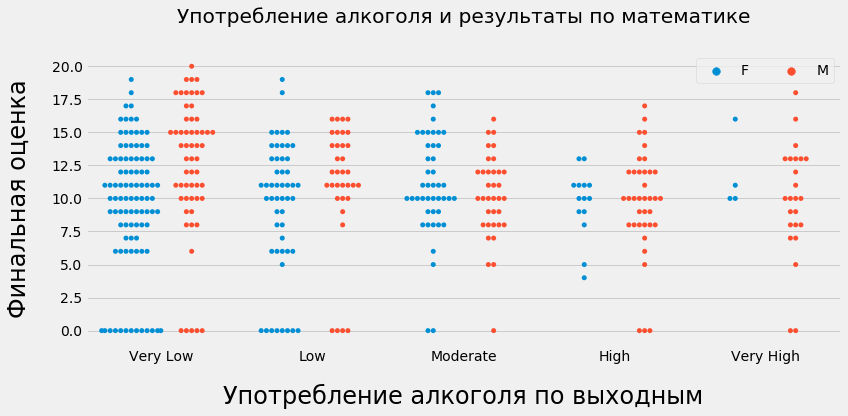

In [60]:
import matplotlib
matplotlib.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.swarmplot(x='Walc',y='G3',hue='sex', data=df,dodge=True)
ax.set_xlabel("Употребление алкоголя по выходным", fontsize=24, labelpad = 20)
ax.set_ylabel("Финальная оценка", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Употребление алкоголя и результаты по математике\n')
ax.legend(ncol=2,loc='upper right')

fig.tight_layout()

Финальная оценка немногим выше у тех студентов, которые пьют очень мало, причем для парней этот показатель выше,чем для девушек. Интересно что в категории "Среднее употребление" оценки у девушек выше чем у парней

#### Как воспитание и забота влияют на оценку

Еще один инетересный признак: кто присматривает за студентом - мама, папа, или он один. И как этот признак влияет на финальную оценку по математике и употрбление алкоголя

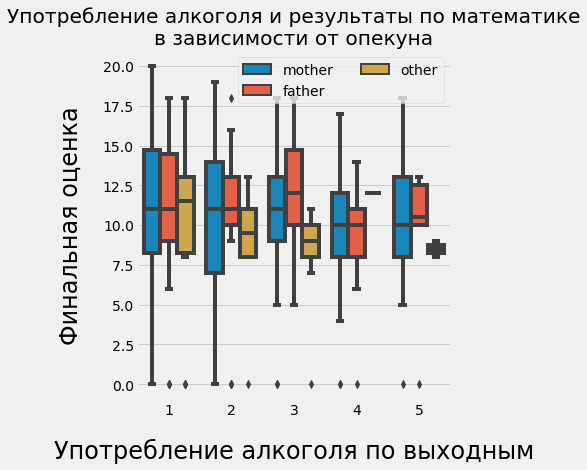

In [47]:
plt.figure(figsize=(5,6))
ax = sns.boxplot(x='Walc',y='G3',data =df,hue='guardian')
ax.set_xlabel("Употребление алкоголя по выходным", fontsize=24, labelpad = 20)
ax.set_ylabel("Финальная оценка", fontsize=24, labelpad = 20)
ax.set_title('Употребление алкоголя и результаты по математике\nв зависимости от опекуна')
ax.legend(ncol=2,loc='upper right')

Максимальная оценка выставляется учеником, который пьет один раз в неделю и находится под присмотром матери или отца.
Даже если ученик пьет пять раз в день,но о нем заботиться мать, то он может получить более высокую оценку. Минимальная оценка выставляется ученикам, которые пьют трижды в неделю и без какого-либо присмотра